In [2]:
import numpy as np
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=PLWHFCZSI5GFFUMN'
r = requests.get(url)
btc_df = r.json()

print(btc_df)

{'Meta Data': {'1. Information': 'Daily Prices and Volumes for Digital Currency', '2. Digital Currency Code': 'BTC', '3. Digital Currency Name': 'Bitcoin', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2021-11-16 00:00:00', '7. Time Zone': 'UTC'}, 'Time Series (Digital Currency Daily)': {'2021-11-16': {'1a. open (USD)': '63606.73000000', '1b. open (USD)': '63606.73000000', '2a. high (USD)': '63617.31000000', '2b. high (USD)': '63617.31000000', '3a. low (USD)': '62510.06000000', '3b. low (USD)': '62510.06000000', '4a. close (USD)': '62786.19000000', '4b. close (USD)': '62786.19000000', '5. volume': '3405.79382000', '6. market cap (USD)': '3405.79382000'}, '2021-11-15': {'1a. open (USD)': '65519.11000000', '1b. open (USD)': '65519.11000000', '2a. high (USD)': '66401.82000000', '2b. high (USD)': '66401.82000000', '3a. low (USD)': '63400.00000000', '3b. low (USD)': '63400.00000000', '4a. close (USD)': '63606.74000000', '4b. close (USD)': '63606.74

In [4]:
btc_daily_df = pd.DataFrame.from_dict(btc_df['Time Series (Digital Currency Daily)']).T
btc_daily_df.head(50)

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
2021-11-16,63606.73000000,63606.73000000,63617.31000000,63617.31000000,62510.06000000,62510.06000000,62786.19000000,62786.19000000,3405.79382000,3405.79382000
2021-11-15,65519.11000000,65519.11000000,66401.82000000,66401.82000000,63400.00000000,63400.00000000,63606.74000000,63606.74000000,37829.37124000,37829.37124000
2021-11-14,64380.01000000,64380.01000000,65550.51000000,65550.51000000,63576.27000000,63576.27000000,65519.10000000,65519.10000000,25705.07347000,25705.07347000
2021-11-13,64122.22000000,64122.22000000,65000.00000000,65000.00000000,63360.22000000,63360.22000000,64380.00000000,64380.00000000,22504.97383000,22504.97383000
2021-11-12,64774.25000000,64774.25000000,65450.70000000,65450.70000000,62278.00000000,62278.00000000,64122.23000000,64122.23000000,44490.10816000,44490.10816000
2021-11-11,64882.42000000,64882.42000000,65600.07000000,65600.07000000,64100.00000000,64100.00000000,64774.26000000,64774.26000000,37237.98058000,37237.98058000
2021-11-10,66947.67000000,66947.67000000,69000.00000000,69000.00000000,62822.90000000,62822.90000000,64882.43000000,64882.43000000,65171.50404600,65171.50404600
2021-11-09,67525.82000000,67525.82000000,68524.25000000,68524.25000000,66222.40000000,66222.40000000,66947.66000000,66947.66000000,44661.37806800,44661.37806800
2021-11-08,63273.58000000,63273.58000000,67789.00000000,67789.00000000,63273.58000000,63273.58000000,67525.83000000,67525.83000000,54442.09455400,54442.09455400
2021-11-07,61470.62000000,61470.62000000,63286.35000000,63286.35000000,61322.78000000,61322.78000000,63273.59000000,63273.59000000,25515.68830000,25515.68830000


In [5]:
btc_daily_df = btc_daily_df.reset_index()

In [6]:
btc_daily_df

,index,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
0,2021-11-16,63606.73000000,63606.73000000,63617.31000000,63617.31000000,62510.06000000,62510.06000000,62786.19000000,62786.19000000,3405.79382000,3405.79382000
1,2021-11-15,65519.11000000,65519.11000000,66401.82000000,66401.82000000,63400.00000000,63400.00000000,63606.74000000,63606.74000000,37829.37124000,37829.37124000
2,2021-11-14,64380.01000000,64380.01000000,65550.51000000,65550.51000000,63576.27000000,63576.27000000,65519.10000000,65519.10000000,25705.07347000,25705.07347000
3,2021-11-13,64122.22000000,64122.22000000,65000.00000000,65000.00000000,63360.22000000,63360.22000000,64380.00000000,64380.00000000,22504.97383000,22504.97383000
4,2021-11-12,64774.25000000,64774.25000000,65450.70000000,65450.70000000,62278.00000000,62278.00000000,64122.23000000,64122.23000000,44490.10816000,44490.10816000
...,...,...,...,...,...,...,...,...,...,...,...
995,2019-02-25,3743.56000000,3743.56000000,3872.66000000,3872.66000000,3740.00000000,3740.00000000,3827.92000000,3827.92000000,38102.96624500,38102.96624500
996,2019-02-24,4118.00000000,4118.00000000,4198.00000000,4198.00000000,3712.66000000,3712.66000000,3743.56000000,3743.56000000,62224.18689000,62224.18689000
997,2019-02-23,3962.00000000,3962.00000000,4162.02000000,4162.02000000,3933.15000000,3933.15000000,4117.76000000,4117.76000000,33657.94288300,33657.94288300
998,2019-02-22,3937.31000000,3937.31000000,3988.00000000,3988.00000000,3926.65000000,3926.65000000,3962.00000000,3962.00000000,23943.16375000,23943.16375000


In [7]:
btc_daily_df = btc_daily_df.rename(columns={'index': 'Date', '1b. open (USD)': 'Open', '2a. high (USD)': 'High', '3a. low (USD)': 'Low', '4a. close (USD)': 'Close', '5. volume': 'Volume'})

In [8]:
btc_daily_df

,Date,1a. open (USD),Open,High,2b. high (USD),Low,3b. low (USD),Close,4b. close (USD),Volume,6. market cap (USD)
0,2021-11-16,63606.73000000,63606.73000000,63617.31000000,63617.31000000,62510.06000000,62510.06000000,62786.19000000,62786.19000000,3405.79382000,3405.79382000
1,2021-11-15,65519.11000000,65519.11000000,66401.82000000,66401.82000000,63400.00000000,63400.00000000,63606.74000000,63606.74000000,37829.37124000,37829.37124000
2,2021-11-14,64380.01000000,64380.01000000,65550.51000000,65550.51000000,63576.27000000,63576.27000000,65519.10000000,65519.10000000,25705.07347000,25705.07347000
3,2021-11-13,64122.22000000,64122.22000000,65000.00000000,65000.00000000,63360.22000000,63360.22000000,64380.00000000,64380.00000000,22504.97383000,22504.97383000
4,2021-11-12,64774.25000000,64774.25000000,65450.70000000,65450.70000000,62278.00000000,62278.00000000,64122.23000000,64122.23000000,44490.10816000,44490.10816000
...,...,...,...,...,...,...,...,...,...,...,...
995,2019-02-25,3743.56000000,3743.56000000,3872.66000000,3872.66000000,3740.00000000,3740.00000000,3827.92000000,3827.92000000,38102.96624500,38102.96624500
996,2019-02-24,4118.00000000,4118.00000000,4198.00000000,4198.00000000,3712.66000000,3712.66000000,3743.56000000,3743.56000000,62224.18689000,62224.18689000
997,2019-02-23,3962.00000000,3962.00000000,4162.02000000,4162.02000000,3933.15000000,3933.15000000,4117.76000000,4117.76000000,33657.94288300,33657.94288300
998,2019-02-22,3937.31000000,3937.31000000,3988.00000000,3988.00000000,3926.65000000,3926.65000000,3962.00000000,3962.00000000,23943.16375000,23943.16375000


In [9]:
btc_daily_df = btc_daily_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
btc_daily_df

,Date,Open,High,Low,Close,Volume
0,2021-11-16,63606.73000000,63617.31000000,62510.06000000,62786.19000000,3405.79382000
1,2021-11-15,65519.11000000,66401.82000000,63400.00000000,63606.74000000,37829.37124000
2,2021-11-14,64380.01000000,65550.51000000,63576.27000000,65519.10000000,25705.07347000
3,2021-11-13,64122.22000000,65000.00000000,63360.22000000,64380.00000000,22504.97383000
4,2021-11-12,64774.25000000,65450.70000000,62278.00000000,64122.23000000,44490.10816000
...,...,...,...,...,...,...
995,2019-02-25,3743.56000000,3872.66000000,3740.00000000,3827.92000000,38102.96624500
996,2019-02-24,4118.00000000,4198.00000000,3712.66000000,3743.56000000,62224.18689000
997,2019-02-23,3962.00000000,4162.02000000,3933.15000000,4117.76000000,33657.94288300
998,2019-02-22,3937.31000000,3988.00000000,3926.65000000,3962.00000000,23943.16375000


In [10]:
btc_daily_df['Open'] = pd.to_numeric(btc_daily_df['Open'], errors='coerce')
btc_daily_df['High'] = pd.to_numeric(btc_daily_df['High'], errors='coerce')
btc_daily_df['Low'] = pd.to_numeric(btc_daily_df['Low'], errors='coerce')
btc_daily_df['Close'] = pd.to_numeric(btc_daily_df['Close'], errors='coerce')
btc_daily_df['Volume'] = pd.to_numeric(btc_daily_df['Volume'], errors='coerce')

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [11]:
btc_daily_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [12]:
btc_daily_df = btc_daily_df.sort_values('Date', ascending = True)
btc_daily_df.head()

,Date,Open,High,Low,Close,Volume
999,2019-02-21,3969.74,4016.48,3901.03,3937.31,31103.884728
998,2019-02-22,3937.31,3988.00,3926.65,3962.00,23943.163750
997,2019-02-23,3962.00,4162.02,3933.15,4117.76,33657.942883
996,2019-02-24,4118.00,4198.00,3712.66,3743.56,62224.186890
995,2019-02-25,3743.56,3872.66,3740.00,3827.92,38102.966245


In [13]:
df = btc_daily_df

In [14]:
df.describe()

,Open,High,Low,Close,Volume
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21482.16790,22130.049730,20781.127050,21541.078650,63155.416883
std,18492.46944,19062.315917,17858.709753,18530.361508,37742.318448
min,3716.10000,3830.000000,3670.690000,3715.300000,3405.793820
25%,8501.54000,8737.500000,8210.035000,8518.307500,38799.836596
50%,10594.90000,10802.065000,10276.675000,10607.470000,54112.962874
75%,35904.38500,37850.000000,34369.862500,35932.542500,78487.249957
max,67525.82000,69000.000000,66222.400000,67525.830000,402201.673764


In [15]:
df = df[['Date', 'Close']]

In [16]:
df.reset_index()
df

,Date,Close
999,2019-02-21,3937.31
998,2019-02-22,3962.00
997,2019-02-23,4117.76
996,2019-02-24,3743.56
995,2019-02-25,3827.92
...,...,...
4,2021-11-12,64122.23
3,2021-11-13,64380.00
2,2021-11-14,65519.10
1,2021-11-15,63606.74


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 999 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1000 non-null   object 
 1   Close   1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.4+ KB


In [18]:
df.isna().values.any()

False

In [19]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


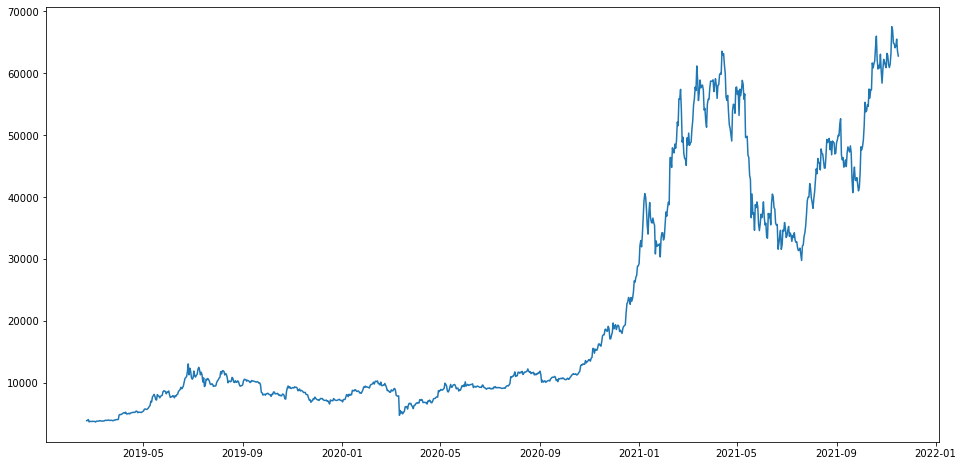

In [20]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [21]:
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
btc_daily_df['Date'].dtypes

dtype('O')

In [23]:
df.shape

(1000, 2)

In [24]:
X_train = np.array(df.iloc[:800, 0]).reshape(-1, 1)
y_train = df.iloc[:800, 1]

In [25]:
# Reshape index column to 2D array for .fit() method
#X_train = np.array(df.iloc[:800, 0]).reshape(-1, 1)
#y_train = train['Close']

In [26]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# The coefficient
print('Slope:', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept:', model.intercept_)

Slope: 5.288770056888978e-13
Intercept: -822947.5242661772


C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


In [28]:
model.predict(X_train)

array([-2.81414363e+03, -2.76844866e+03, -2.72275368e+03, -2.67705871e+03,
       -2.63136374e+03, -2.58566876e+03, -2.53997379e+03, -2.49427882e+03,
       -2.44858384e+03, -2.40288887e+03, -2.35719390e+03, -2.31149892e+03,
       -2.26580395e+03, -2.22010898e+03, -2.17441400e+03, -2.12871903e+03,
       -2.08302406e+03, -2.03732908e+03, -1.99163411e+03, -1.94593914e+03,
       -1.90024416e+03, -1.85454919e+03, -1.80885422e+03, -1.76315924e+03,
       -1.71746427e+03, -1.67176930e+03, -1.62607432e+03, -1.58037935e+03,
       -1.53468438e+03, -1.48898940e+03, -1.44329443e+03, -1.39759946e+03,
       -1.35190448e+03, -1.30620951e+03, -1.26051454e+03, -1.21481956e+03,
       -1.16912459e+03, -1.12342962e+03, -1.07773464e+03, -1.03203967e+03,
       -9.86344698e+02, -9.40649725e+02, -8.94954752e+02, -8.49259778e+02,
       -8.03564805e+02, -7.57869832e+02, -7.12174859e+02, -6.66479885e+02,
       -6.20784912e+02, -5.75089939e+02, -5.29394965e+02, -4.83699992e+02,
       -4.38005019e+02, -

In [29]:
X_train.shape

(800, 1)

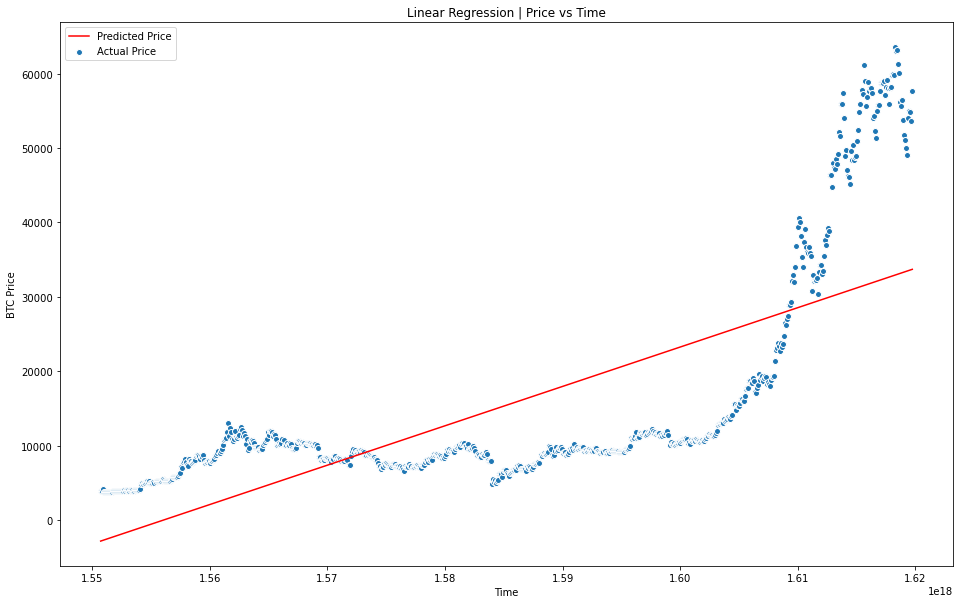

In [30]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

In [31]:
model.predict(X_train)

array([-2.81414363e+03, -2.76844866e+03, -2.72275368e+03, -2.67705871e+03,
       -2.63136374e+03, -2.58566876e+03, -2.53997379e+03, -2.49427882e+03,
       -2.44858384e+03, -2.40288887e+03, -2.35719390e+03, -2.31149892e+03,
       -2.26580395e+03, -2.22010898e+03, -2.17441400e+03, -2.12871903e+03,
       -2.08302406e+03, -2.03732908e+03, -1.99163411e+03, -1.94593914e+03,
       -1.90024416e+03, -1.85454919e+03, -1.80885422e+03, -1.76315924e+03,
       -1.71746427e+03, -1.67176930e+03, -1.62607432e+03, -1.58037935e+03,
       -1.53468438e+03, -1.48898940e+03, -1.44329443e+03, -1.39759946e+03,
       -1.35190448e+03, -1.30620951e+03, -1.26051454e+03, -1.21481956e+03,
       -1.16912459e+03, -1.12342962e+03, -1.07773464e+03, -1.03203967e+03,
       -9.86344698e+02, -9.40649725e+02, -8.94954752e+02, -8.49259778e+02,
       -8.03564805e+02, -7.57869832e+02, -7.12174859e+02, -6.66479885e+02,
       -6.20784912e+02, -5.75089939e+02, -5.29394965e+02, -4.83699992e+02,
       -4.38005019e+02, -

In [32]:
X_test = np.array(df.iloc[800:, 0]).reshape(-1, 1)
y_test = df.iloc[800:, 1]

In [33]:
model.predict(X_test)

array([33741.83500325, 33787.52997655, 33833.22494984, 33878.91992313,
       33924.61489642, 33970.30986971, 34016.004843  , 34061.69981629,
       34107.39478959, 34153.08976288, 34198.78473617, 34244.47970946,
       34290.17468275, 34335.86965604, 34381.56462934, 34427.25960263,
       34472.95457592, 34518.64954921, 34564.3445225 , 34610.03949579,
       34655.73446908, 34701.42944238, 34747.12441567, 34792.81938896,
       34838.51436225, 34884.20933554, 34929.90430883, 34975.59928213,
       35021.29425542, 35066.98922871, 35112.684202  , 35158.37917529,
       35204.07414858, 35249.76912187, 35295.46409517, 35341.15906846,
       35386.85404175, 35432.54901504, 35478.24398833, 35523.93896162,
       35569.63393491, 35615.32890821, 35661.0238815 , 35706.71885479,
       35752.41382808, 35798.10880137, 35843.80377466, 35889.49874796,
       35935.19372125, 35980.88869454, 36026.58366783, 36072.27864112,
       36117.97361441, 36163.6685877 , 36209.363561  , 36255.05853429,
      

In [34]:
y_test

Date
2021-05-01    57800.37
2021-05-02    56578.21
2021-05-03    57169.39
2021-05-04    53200.01
2021-05-05    57436.11
                ...   
2021-11-12    64122.23
2021-11-13    64380.00
2021-11-14    65519.10
2021-11-15    63606.74
2021-11-16    62786.19
Name: Close, Length: 200, dtype: float64

In [37]:
y_test = pd.DataFrame(y_test)
y_test 

,Close
Date,
2021-05-01,57800.37
2021-05-02,56578.21
2021-05-03,57169.39
2021-05-04,53200.01
2021-05-05,57436.11
...,...
2021-11-12,64122.23
2021-11-13,64380.00
2021-11-14,65519.10


In [36]:
model.predict(X_test) 

array([33741.83500325, 33787.52997655, 33833.22494984, 33878.91992313,
       33924.61489642, 33970.30986971, 34016.004843  , 34061.69981629,
       34107.39478959, 34153.08976288, 34198.78473617, 34244.47970946,
       34290.17468275, 34335.86965604, 34381.56462934, 34427.25960263,
       34472.95457592, 34518.64954921, 34564.3445225 , 34610.03949579,
       34655.73446908, 34701.42944238, 34747.12441567, 34792.81938896,
       34838.51436225, 34884.20933554, 34929.90430883, 34975.59928213,
       35021.29425542, 35066.98922871, 35112.684202  , 35158.37917529,
       35204.07414858, 35249.76912187, 35295.46409517, 35341.15906846,
       35386.85404175, 35432.54901504, 35478.24398833, 35523.93896162,
       35569.63393491, 35615.32890821, 35661.0238815 , 35706.71885479,
       35752.41382808, 35798.10880137, 35843.80377466, 35889.49874796,
       35935.19372125, 35980.88869454, 36026.58366783, 36072.27864112,
       36117.97361441, 36163.6685877 , 36209.363561  , 36255.05853429,
      

In [40]:
df = df.iloc[800:]

In [41]:
df['Predictions'] = model.predict(X_test)

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df.head(20)


,Date,Close,Predictions
Date,,,
2021-05-01,1619827200000000000,57800.37,33741.835003
2021-05-02,1619913600000000000,56578.21,33787.529977
2021-05-03,1620000000000000000,57169.39,33833.224950
2021-05-04,1620086400000000000,53200.01,33878.919923
2021-05-05,1620172800000000000,57436.11,33924.614896
2021-05-06,1620259200000000000,56393.68,33970.309870
2021-05-07,1620345600000000000,57314.75,34016.004843
2021-05-08,1620432000000000000,58862.05,34061.699816
2021-05-09,1620518400000000000,58240.84,34107.394790


In [44]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

C:\Users\mathi\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df

,Date,Close,Predictions
Date,,,
2021-05-01,2021-05-01,57800.37,33741.835003
2021-05-02,2021-05-02,56578.21,33787.529977
2021-05-03,2021-05-03,57169.39,33833.224950
2021-05-04,2021-05-04,53200.01,33878.919923
2021-05-05,2021-05-05,57436.11,33924.614896
...,...,...,...
2021-11-12,2021-11-12,64122.23,42652.354795
2021-11-13,2021-11-13,64380.00,42698.049768
2021-11-14,2021-11-14,65519.10,42743.744742


In [47]:
BTC_Linear_Regresson_Results = df 
BTC_Linear_Regresson_Results

,Date,Close,Predictions
Date,,,
2021-05-01,2021-05-01,57800.37,33741.835003
2021-05-02,2021-05-02,56578.21,33787.529977
2021-05-03,2021-05-03,57169.39,33833.224950
2021-05-04,2021-05-04,53200.01,33878.919923
2021-05-05,2021-05-05,57436.11,33924.614896
...,...,...,...
2021-11-12,2021-11-12,64122.23,42652.354795
2021-11-13,2021-11-13,64380.00,42698.049768
2021-11-14,2021-11-14,65519.10,42743.744742
